In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [34]:
#import dataset
df = pd.read_csv('car_evaluation.csv')

## Exploratory Data Analysis

In [35]:
df.head(5)

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [36]:
df.shape

(1727, 7)

In [37]:
#rename column names
col_names = ['price', 'service', 'doors', 'persons', 'boot', 'safety', 'class']
df.columns = col_names
df.head(5)

,price,service,doors,persons,boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   price    1727 non-null   object
 1   service  1727 non-null   object
 2   doors    1727 non-null   object
 3   persons  1727 non-null   object
 4   boot     1727 non-null   object
 5   safety   1727 non-null   object
 6   class    1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


No null value is present, dataset is already preprocessed.

In [39]:
df['class'].value_counts()

unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64

The `class` target is ordinal in nature.

## Split data into separate training and test set

In [40]:
X = df.drop('class', axis=1)
y = df['class']

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [42]:
X_train.shape, X_test.shape

((1157, 6), (570, 6))

## Feature Engineering

In [43]:
X_train.dtypes

price      object
service    object
doors      object
persons    object
boot       object
safety     object
dtype: object

In [44]:
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=col_names[:6])
X_train = encoder.fit_transform(X_train)
X_test = encoder.fit_transform(X_test)

In [45]:
X_train.head(5)

,price,service,doors,persons,boot,safety
83,1,1,1,1,1,1
48,1,1,2,2,1,2
468,2,1,2,3,2,2
155,1,2,2,2,1,1
1043,3,2,3,2,2,1


# Random Forest Classifier 

## 1. for n_estimators=10

n_estimators parameter is equal to number of decision tree.

In [46]:
from sklearn.ensemble import RandomForestClassifier


rfc = RandomForestClassifier(n_estimators=10, random_state=0)
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

#cheking accuracy score
from sklearn.metrics import accuracy_score
print('Model accuracy with 10 decision tree : {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Model accuracy with 10 decision tree : 0.9474


## 2. for n_estimators=100 (by default value)

In [47]:
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

#cheking accuracy score
from sklearn.metrics import accuracy_score
print('Model accuracy with 100 decision tree : {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Model accuracy with 100 decision tree : 0.9649


### Feature Importance 

In [24]:
#feature score
feature_scores = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

safety     0.291657
persons    0.235380
price      0.160692
service    0.134143
boot       0.111595
doors      0.066533
dtype: float64

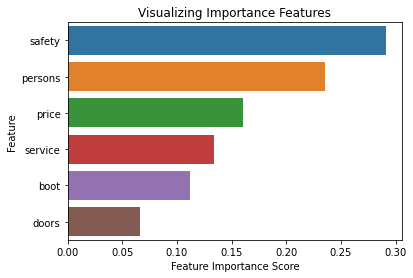

In [25]:
#visualize feature importance
sns.barplot(x=feature_scores, y=feature_scores.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature')
plt.title('Visualizing Importance Features')
plt.show()

In [27]:
#lets remove doors feature and check if it affects our accuracy or not
X_train2 = X_train.drop('doors',axis=1)
X_test2 = X_test.drop('doors',axis=1)

In [30]:
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train2, y_train)
y_pred2 = clf.predict(X_test2)
print('Accuracy of model with doors feature removed : {0:0.4f}'.format(accuracy_score(y_test,y_pred2)))

Accuracy of model with doors feature removed : 0.9263


The accuracy has decreased so we will not drop the doors column form dataset.

In [31]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[119   2   5   1]
 [  1  13   2   2]
 [  2   0 397   0]
 [  5   0   0  21]]


In [48]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         acc       0.94      0.94      0.94       127
        good       0.87      0.72      0.79        18
       unacc       0.98      0.99      0.99       399
       vgood       0.88      0.81      0.84        26

    accuracy                           0.96       570
   macro avg       0.92      0.87      0.89       570
weighted avg       0.96      0.96      0.96       570

